<a href="https://colab.research.google.com/github/prabh505/GDP_Analysis/blob/main/GDP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/gdp.csv')

In [3]:
# Basic info
print("✅ Dataset Info:")
df.info()
print("\n🔹 Shape:", df.shape)

# Head
print("\n🔹 First Rows:")
display(df.head())

✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB

🔹 Shape: (11507, 4)

🔹 First Rows:


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [4]:
# Check for nulls
print("\n🔹 Null Values:")
print(df.isnull().sum())


🔹 Null Values:
Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64


In [5]:
# Summary statistics
print("\n🔹 Summary:")
display(df.describe(include='all'))


🔹 Summary:


,Country Name,Country Code,Year,Value
count,11507,11507,11507.000000,1.150700e+04
unique,256,256,NaN,NaN
top,Caribbean small states,CSS,NaN,NaN
freq,57,57,NaN,NaN
mean,NaN,NaN,1991.265230,1.005972e+12
std,NaN,NaN,15.886648,4.533056e+12
min,NaN,NaN,1960.000000,8.824448e+06
25%,NaN,NaN,1978.000000,2.056874e+09
50%,NaN,NaN,1993.000000,1.436880e+10
75%,NaN,NaN,2005.000000,1.796394e+11



🔹 Unique countries: 256


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


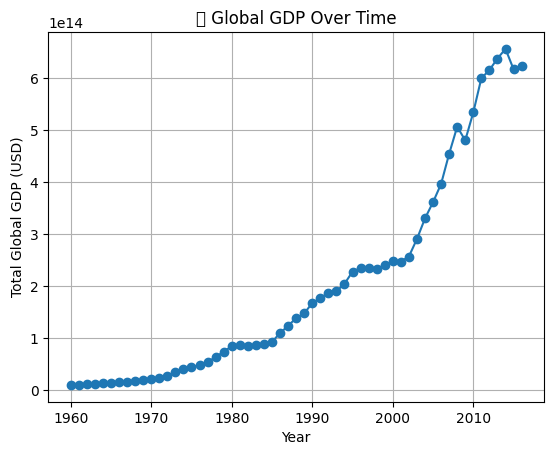

In [6]:
# Unique countries
print("\n🔹 Unique countries:", df['Country Name'].nunique())

# GDP per year globally
yearly_gdp = df.groupby('Year')['Value'].sum()
yearly_gdp.plot(title='🌍 Global GDP Over Time', marker='o')
plt.ylabel('Total Global GDP (USD)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


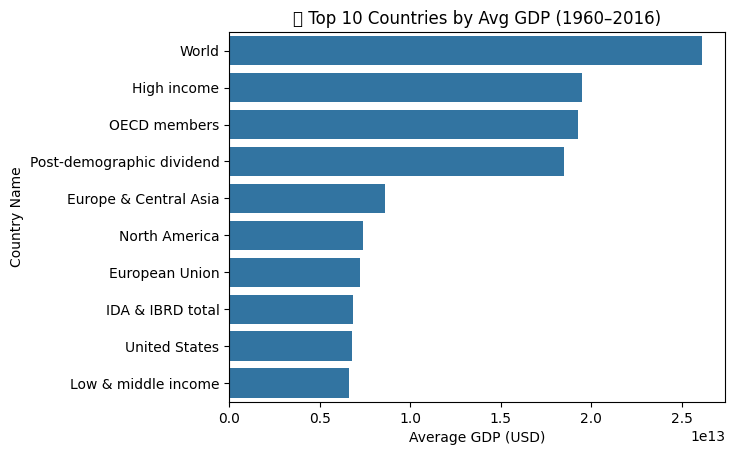

In [7]:
# Top 10 countries by average GDP
top_countries = df.groupby('Country Name')['Value'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("💰 Top 10 Countries by Avg GDP (1960–2016)")
plt.xlabel("Average GDP (USD)")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


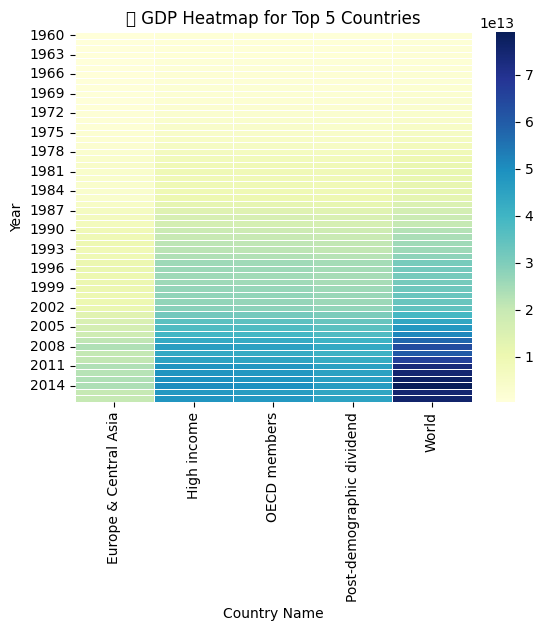

In [8]:
# Heatmap of GDP over time for top 5 countries
top5_names = top_countries.index[:5]
pivot_df = df[df['Country Name'].isin(top5_names)].pivot(index='Year', columns='Country Name', values='Value')
sns.heatmap(pivot_df, cmap='YlGnBu', linewidths=0.5)
plt.title("📈 GDP Heatmap for Top 5 Countries")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


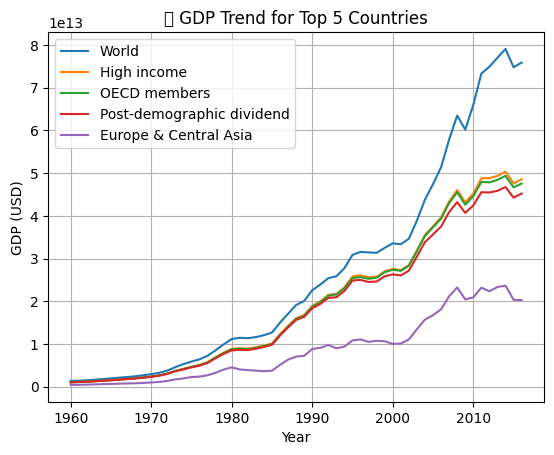

In [9]:
# Trend line for each of top 5 countries
for country in top5_names:
    sub = df[df['Country Name'] == country]
    plt.plot(sub['Year'], sub['Value'], label=country)
plt.legend()
plt.title("📉 GDP Trend for Top 5 Countries")
plt.ylabel("GDP (USD)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

#Kmeans Clusstering by gdp


In [11]:
# Apply KMeans clustering with 4 clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pivot_df.drop(['Cluster', 'Country'], axis=1, errors='ignore'))


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
pivot_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Add country names back as a column
pivot_df['Country'] = pivot_df.index

# Check number of countries per cluster
print("Countries per cluster:")
print(pivot_df['Cluster'].value_counts())

# Sample countries from each cluster
print("\nExample countries in each cluster:")
for i in range(4):
    print(f"\nCluster {i}:")
    print(pivot_df[pivot_df['Cluster'] == i]['Country'].head(5).to_list())

Countries per cluster:
Cluster
2    18
3    15
0    12
1    12
Name: count, dtype: int64

Example countries in each cluster:

Cluster 0:
[1978, 1979, 1980, 1981, 1982]

Cluster 1:
[2005, 2006, 2007, 2008, 2009]

Cluster 2:
[1960, 1961, 1962, 1963, 1964]

Cluster 3:
[1990, 1991, 1992, 1993, 1994]


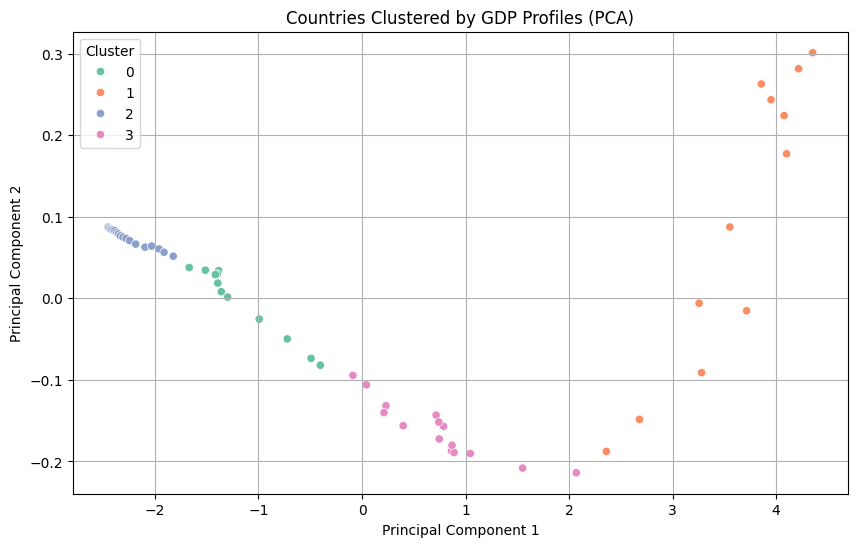

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=pivot_df['Cluster'], palette='Set2')
plt.title("Countries Clustered by GDP Profiles (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
